In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from scipy.sparse import csgraph
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import sparse
from scipy import linalg
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.neighbors import kneighbors_graph


In [7]:
#Steps to perform spectral clustering for 2D-Concetric Circles dataset.

#1.   Generate the dataset using sklearn package.
#2.   Translate the dataset into low-dimention using adjacency matrix and laplacian matrix in order to generate eigenvalues and eigenvectors.
#3.   Convert the eigenvalues and eigenvectors to real values.
#4.   Sort the eigenvalues and calculate num_clusters eigenvectors e_1, e_2, ..., e_num_clusters as columns.
#5.   Form cluster with k-means by passing real eigenvectors.

In [8]:
''' Generate 2D concentric circle data '''
def generate_2D_concentric_circle():
    data_circle, ground_circle = make_circles(n_samples=1500, factor=.5, noise=.05)
    return data_circle

In [9]:
''' Calculate Adjacency Matrix '''
def calculate_adj_laplacian(data_circle,n_neighbors):
    # Adjacency Matrix.
    connectivity = kneighbors_graph(data_circle, n_neighbors=n_neighbors, mode='connectivity')
    A = (1/2)*(connectivity + connectivity.T)
    # Graph Laplacian.
    laplacian_sparse = sparse.csgraph.laplacian(csgraph=A, normed=False)
    L = laplacian_sparse.toarray()
    return L 

In [10]:
'''Calculate Eigenvalue and Eigenvector'''
def calculate_eigenvalue_eigenvector(L):
    eigenvals, eigenvects = linalg.eig(L)
    return eigenvals, eigenvects

In [11]:
'''Convert eigenvals and eigenvectors to real numbers'''
def convert_to_real(eigenvals, eigenvects, num_clusters):
    eigenvals_real = np.real(eigenvals) #Calculated eigenvalues are complex numbers, change it to real numbers
    eigenvects_real = np.real(eigenvects) #Calculated eigenvectors are complex numbers, change it to real numbers
    eigenvals_sorted = np.argsort(eigenvals_real)
    eigenvals_indices = eigenvals_sorted[: num_clusters]
    eigenvects_real = pd.DataFrame(eigenvects[:, eigenvals_indices.squeeze()])#Create two columns for two clusters. Keep the eigenvects for each eigenvalues to corresponding clusters. 
    return eigenvects_real

In [12]:
'''K-means clustering.'''
def k_means_clustering(df, n_clusters):
    k_means = KMeans(random_state=25, n_clusters=n_clusters)
    k_means.fit(df)
    cluster = k_means.predict(df)
    return cluster

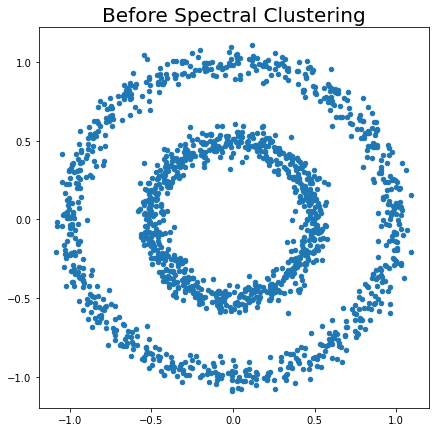

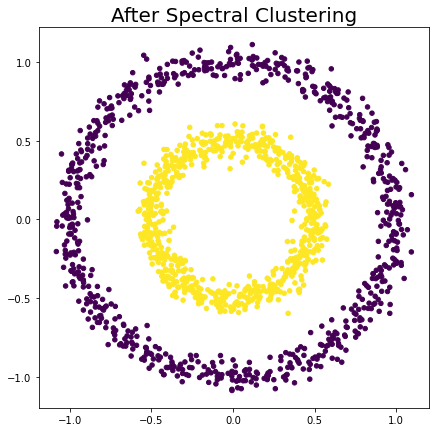

In [13]:
data_circle = generate_2D_concentric_circle()  
n_neighbors = 8
L = calculate_adj_laplacian(data_circle, n_neighbors)
eigenvals, eigenvects = calculate_eigenvalue_eigenvector(L)

num_clusters = 2
eigenvects_real = convert_to_real(eigenvals, eigenvects, num_clusters)
cluster = k_means_clustering(eigenvects_real, eigenvects_real.columns.size)

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(data_circle[:, 0], data_circle[:, 1],s=20)
ax.set_title('Before Spectral Clustering', fontsize=20)

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(data_circle[:, 0], data_circle[:, 1],c=cluster ,s=20)
ax.set_title('After Spectral Clustering', fontsize=20);